# 유제희_인공지능기초_중간대체과제

1. MNIST 데이터셋 로딩 및 초기 환경 설정 python 3.10.13제출

In [1]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
%pip install torchvision    
%pip install torchinfo     
%pip install pytorchcv      
%pip install tensorflow
%pip install keras-targeted-dropout

import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np
import pytorchcv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

from pytorchcv import load_FashionMNIST, train, plot_results, plot_convolution, display_dataset
load_FashionMNIST(batch_size=128) 

--2024-04-24 11:26:07--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540 (6.4K) [text/plain]
Saving to: ‘pytorchcv.py.2’

pytorchcv.py.2      100%[===================>]   6.39K  --.-KB/s    in 0s      

2024-04-24 11:26:07 (13.7 MB/s) - ‘pytorchcv.py.2’ saved [6540/6540]

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


2024-04-24 11:26:51.712831: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 11:26:55.369639: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 데이트셋 로드, 전체 데이터 분류, 정규화
Fashion-MNIST 데이터셋 로드 후, 훈련 데이터와 테스트 데이터를 나눈다. 
이때 데이터는 훈련 데이터 80%와 테스트 데이터 20%로 비율을 나누었다.
60000개 데이터를 나누게 되면 훈련데이터(48000개), 테스트 데이터(10000개)가 된다.

In [2]:
# Fashion-MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


# 훈련 데이터와 테스트 데이터를 0.8:0.2 비율로 분할
train_size = int(0.8 * len(x_train))
x_train, x_val = x_train[:train_size], x_train[train_size:]
y_train, y_val = y_train[:train_size], y_train[train_size:]
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 이미지 데이터 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 데이터 형태 확인
print("훈련 데이터 shape:", x_train.shape)
print("테스트 데이터 shape:", x_test.shape)

훈련 데이터 shape: (48000, 28, 28, 1)
테스트 데이터 shape: (10000, 28, 28, 1)


# 데이터 시각화
데이터를 100개를 랜덤으로 보여준다.

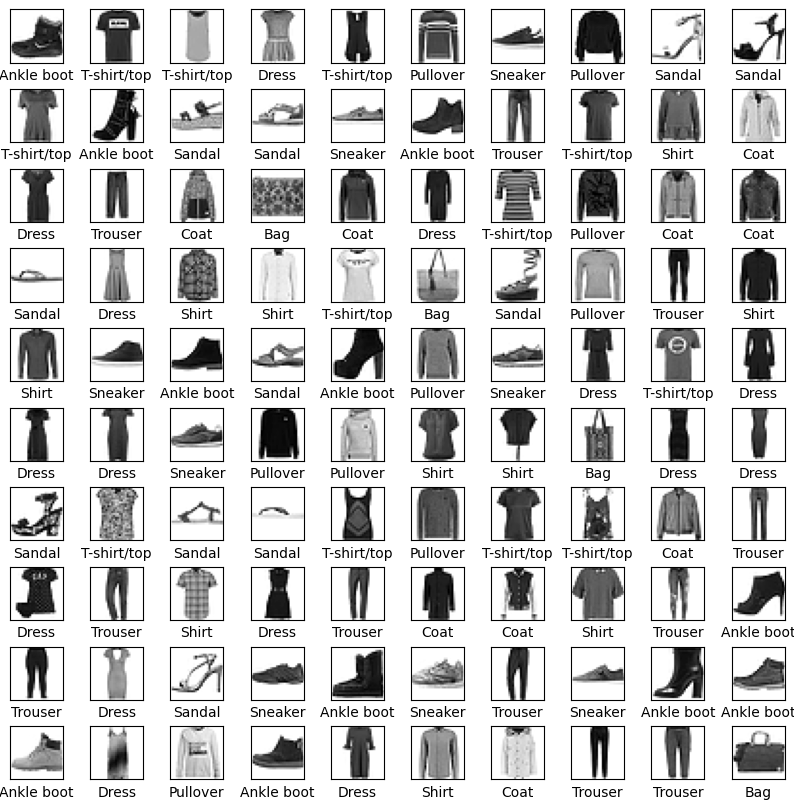

In [3]:
# 클래스 이름 정의 (Fashion-MNIST의 클래스 이름은 없지만 숫자를 기반으로 예측됩니다)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 시각화, 랜덤으로 100개의 데이터만 우선적으로 보여주기
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [4]:
# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# 모델 훈련
데이터를 5번 훈련 시킨다. 
결과로는 훈련데이터의 손실이 적은 편이며, 훈련을 하고 있기 때문에 적은 것을 알 수 있다. 테스트 데이터가 손실도가 높은 걸 알 수 있다. 손실도 가 높을 수록 정확도가 떨어지는 것을 알 수 있다.

In [5]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 정보 출력
model.summary()

# 모델 훈련
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val), verbose=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


2024-04-24 11:27:28.507773: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


  5/750 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.2201 - loss: 2.2658

2024-04-24 11:27:29.975303: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2024-04-24 11:27:29.984036: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2024-04-24 11:27:30.017828: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.
2024-04-24 11:27:30.018534: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 17981568 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.7240 - loss: 0.7775 - val_accuracy: 0.8477 - val_loss: 44.3562
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.8667 - loss: 0.3693 - val_accuracy: 0.8666 - val_loss: 40.5740
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.8882 - loss: 0.3041 - val_accuracy: 0.8418 - val_loss: 49.2348
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.8976 - loss: 0.2772 - val_accuracy: 0.8773 - val_loss: 38.9317
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9094 - loss: 0.2511 - val_accuracy: 0.8077 - val_loss: 68.0227


# 5번 훈련 시킨 그래프 출력

손실과 정확도를 흐름에 따라 보는 것이 좋을 거 같아 히스토그램을 선택하였다.

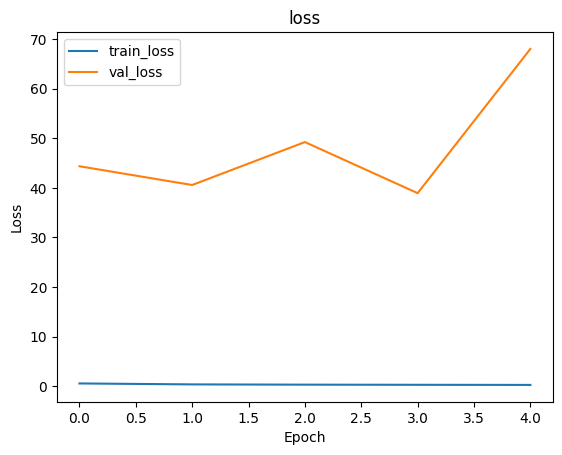

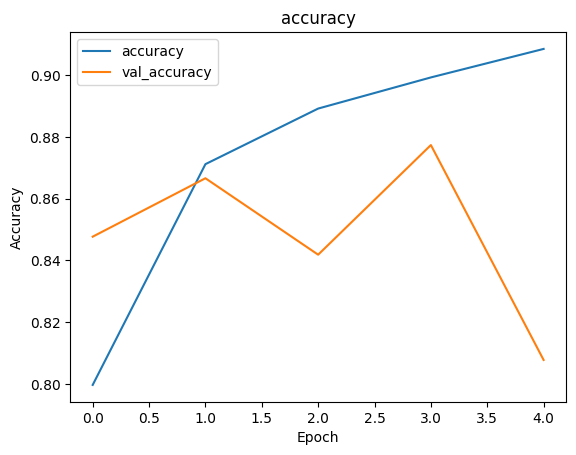

In [6]:
# 손실과 정확도 그래프 출력
plt.title('loss')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 요약 정보를 accuracy 그래프 사용하여 출력
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

훈련을 할 때 정확도와 손실이 점점 적어지는 것을 알 수 있다.
이때 훈련을 할수록 정확성이 떨어지나 의문을 재기한다.
그래서 훈련을 5번이 아닌 10번으로 늘리면 더 떨어지나 다시 한번 모델링하려고 한다.

In [7]:
# 5번 훈련 시킨 테스트 데이터에서 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("테스트 손실:", test_loss)
print("테스트 정확도:", test_acc)

테스트 손실: 0.2999372184276581
테스트 정확도: 0.8937000036239624


In [8]:
# 5번 훈련 시킨 모델 평가
val_loss, val_acc = model.evaluate(x_train, y_train, verbose=0)
print("학습 손실:", val_loss)
print("학습 정확도:", val_acc)

학습 손실: 0.2341448813676834
학습 정확도: 0.914354145526886


# CNN 모델 재정의

10번 다시 훈련하기 위해 모델을 재정의를 한다.

In [9]:
# CNN 모델 재정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [10]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 정보 출력
model.summary()

# 10번 모델 훈련
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val), verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 65ms/step - accuracy: 0.7124 - loss: 0.7974 - val_accuracy: 0.8451 - val_loss: 45.7650
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.8685 - loss: 0.3706 - val_accuracy: 0.8541 - val_loss: 47.9933
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 61ms/step - accuracy: 0.8828 - loss: 0.3218 - val_accuracy: 0.8330 - val_loss: 55.9564
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.8936 - loss: 0.2917 - val_accuracy: 0.8487 - val_loss: 47.0385
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9047 - loss: 0.2589 - val_accuracy: 0.8431 - val_loss: 51.6800
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9120 - loss: 0.2421 - val_accuracy: 0.8583 - val_loss: 49.2708
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9176 - loss: 0.2213 - val_accuracy: 0.8265 - val_loss: 67.7508
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9225 - loss: 0.

같은 데이터를 10번씩 훈련을 시키니 훈련시에 정확도는 높아지며, 손실는 점점 낮아지는 것을 알 수 있다.


하지만 테스트를 할 때는 어떨까?

훈련을 할 때와 결과가 달라지는 것을 알 수 있다. 5번 훈련을 할 때는 손실이 약 50% 정도였지만, 10번 훈련을 할 시 약60%까지 오른 것을 알 수 있다.

# 10번 훈련한 모델을 loss와 accuracy에 대한 그래프
 

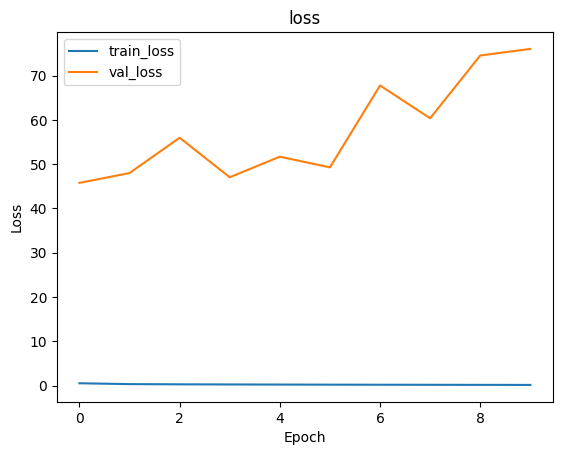

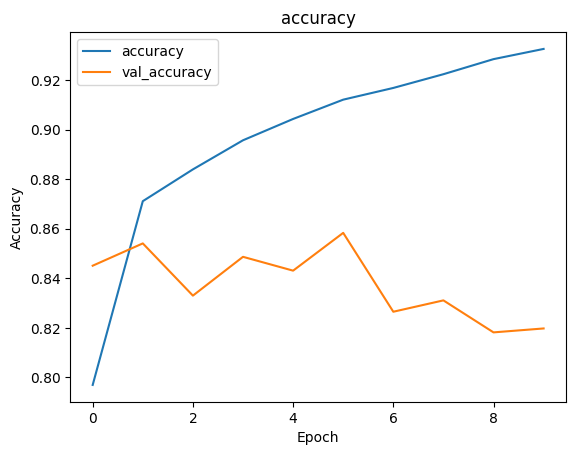

In [11]:
# 손실과 정확도 그래프 출력
plt.title('loss')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 요약 정보를 accuracy 그래프 사용하여 출력
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# 10번 훈련 시킨 테스트 데이터에서 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("테스트 손실:", test_loss)
print("테스트 정확도:", test_acc)

테스트 손실: 0.277782142162323
테스트 정확도: 0.9035000205039978


In [13]:
# 10번 훈련 시킨 모델 평가
val_loss, val_acc = model.evaluate(x_train, y_train, verbose=0)
print("학습 손실:", val_loss)
print("학습 정확도:", val_acc)

학습 손실: 0.15844228863716125
학습 정확도: 0.9406041502952576


# CNN을 Dropout 추가하여, 모델 재정의

위에 있는 다른 cnn에 비해 정확도 측면에서 높은 정확도를 보여주었다. 
이전 cnn은 학습을 할때 2개로 Convolutional layer와 Pooling layer으로 구성하여 모델링 학습을 시켰다. 
Convolutional layer와 Pooling layer은 이미지 처리에 탁월한 성능을 보이는 신경망이기 때문에 많은 이들이 이미지를 처리할 때 많이 사용하는 것을 알고 있다. 

하지만 비슷하게 생긴 길이, 프레임들을 구분하기는 어렵다는 점을 알 수 있다. 또한 많은 모델링은 과적합을 불러 올 수 있다.(테스트 셋 오류 감소)
이 때문에 Dropout을 데이터 학습을 할때 같이 사용해 보았다.

In [14]:
# cnn 모델을 재정의 (Dropout 추가)
model_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [15]:
# 모델 컴파일 및 모델 훈련
model_dropout.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

# 모델 요약 정보 출력 (Dropout 추가)
model_dropout.summary()

Epoch 1/5
 43/750 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.3476 - loss: 1.8788

750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6847 - loss: 0.8869 - val_accuracy: 0.8418 - val_loss: 46.2066
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.8369 - loss: 0.4514 - val_accuracy: 0.8670 - val_loss: 36.0541
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.8615 - loss: 0.3863 - val_accuracy: 0.8677 - val_loss: 36.4210
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.8751 - loss: 0.3472 - val_accuracy: 0.8609 - val_loss: 40.9854
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.8836 - loss: 0.3136 - val_accuracy: 0.8619 - val_loss: 38.2529


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

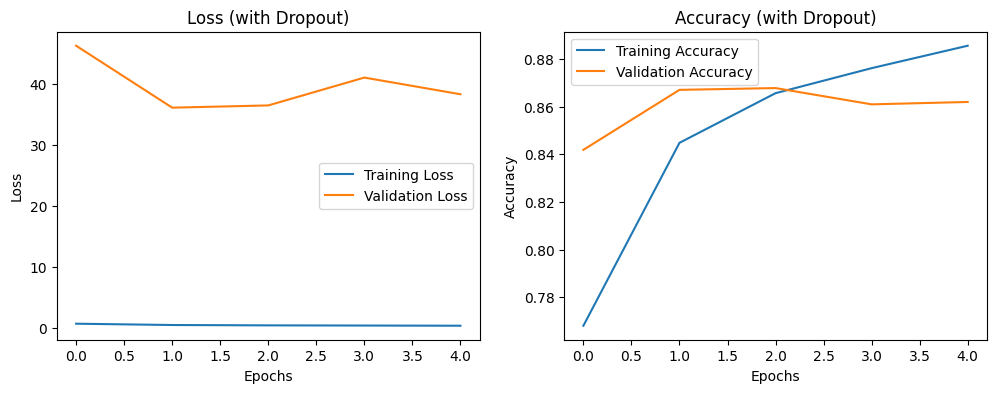

In [16]:
# 손실, 정확도에 대한 그래프 출력 (Dropout 추가)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['loss'], label='Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.title('Loss (with Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy (with Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

이전의 Convolutional layer와 Pooling layerdm으로만 학습시킨 모델링보다 높아지는 그래프 형태를 볼 수 있다. 손실 또한 낮춰진 것을 알 수 있다.

In [18]:
# 테스트 데이터에서 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("테스트 손실:", test_loss)
print("테스트 정확도:", test_acc)

테스트 손실: 0.27604323625564575
테스트 정확도: 0.9042999744415283


# 정확도와 손실도 높은 모델링으로 오분류하기
Convolutional layer와 Pooling layer으로 학습 시킨 모델링보다 Dropout와 함께 학습 시킨 모델링이 지속적으로 높은 모델링 결과를 나타낸 것을 볼 수 있었다

따라서 좋은 결과를 보여준 모델링의 오분류된 이미지와 오분류가 많이 된 클래스를 찾아보려한다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


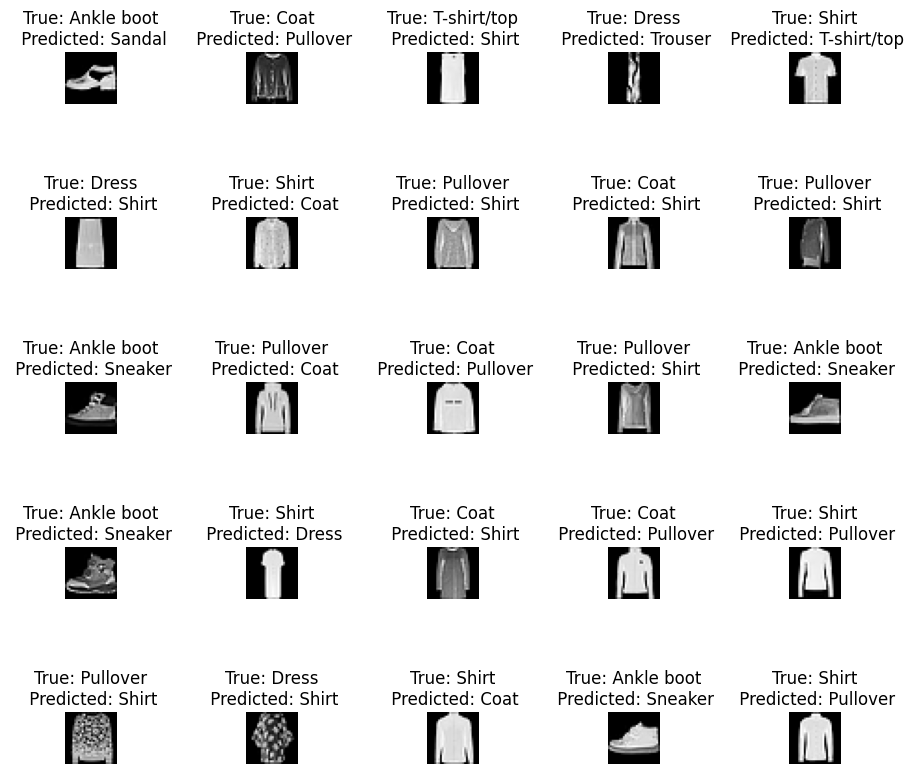

In [17]:
# 모델로부터 예측을 수행합니다.
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# 오분류된 이미지를 찾습니다.
misclassified_indices = np.where(predicted_labels != y_test)[0]

# 오분류된 이미지를 출력합니다.
plt.figure(1,figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.subplots_adjust(wspace=2.5, hspace=0.5)
    plt.title(f"True: {class_names[y_test[idx]]}\n Predicted: {class_names[predicted_labels[idx]]}")
    plt.axis('off')
plt.show()

# 오분류 수 및 오 분류한 비율

In [18]:
# 오분류된 이미지 수 계산
misclassified_count = len(misclassified_indices)
total_count = len(y_test)
misclassification_rate = misclassified_count / total_count * 100

print("오분류된 이미지 수:", misclassified_count)
print("전체 테스트 이미지 수:", total_count)
print("오분류율: {:.2f}%".format(misclassification_rate))

오분류된 이미지 수: 965
전체 테스트 이미지 수: 10000
오분류율: 9.65%


In [19]:
# 클래스별로 오분류된 이미지 수를 저장할 딕셔너리 생성
misclassified_by_class = {i: 0 for i in range(10)}

# 클래스별로 오분류된 이미지 수 계산
for idx in misclassified_indices:
    true_label = y_test[idx]
    predicted_label = predicted_labels[idx]
    if true_label != predicted_label:
        misclassified_by_class[true_label] += 1

print("클래스별 오분류된 이미지 수:")
for class_label, misclassified_count in misclassified_by_class.items():
    print(f"클래스 {class_names[class_label]}: {misclassified_count} 개")
    

클래스별 오분류된 이미지 수:
클래스 T-shirt/top: 135 개
클래스 Trouser: 19 개
클래스 Pullover: 129 개
클래스 Dress: 148 개
클래스 Coat: 126 개
클래스 Sandal: 21 개
클래스 Shirt: 288 개
클래스 Sneaker: 21 개
클래스 Bag: 17 개
클래스 Ankle boot: 61 개


오분류된 데이터를 클래스별로 분류해본 결과 shirt 클래스가 제일 많이 분류를 하지 못한다는 것을 알 수 있다.

# 오분류된 이미지 클래스별 그래프로 이미지화
오분류된 이미지를 분류뿐 아니라 한 눈에 비교할 수 있게 막대그래프를 통해 보여주었다.

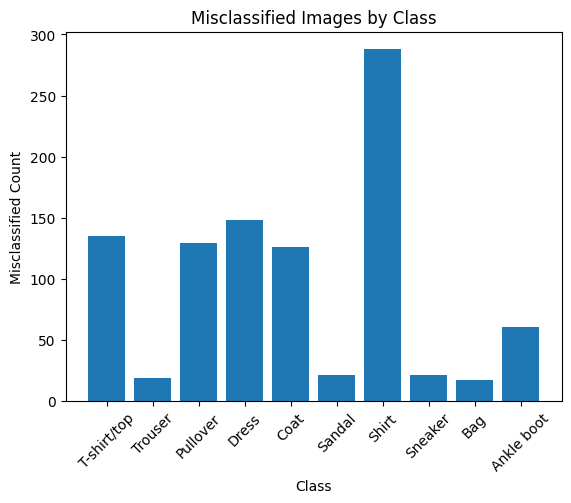

In [20]:
# 클래스별 오분류된 이미지 수를 막대 그래프로 표시합니다.
plt.bar(list(misclassified_by_class.keys()), list(misclassified_by_class.values()))
plt.xlabel('Class')
plt.ylabel('Misclassified Count')
plt.title('Misclassified Images by Class')
plt.xticks(list(misclassified_by_class.keys()), labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], rotation=45)
plt.show()